In [1]:
%matplotlib inline
import lightkurve as lk
from lightkurve_ext import download_lightcurvefiles
import tic_plot as tplt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib

import pandas as pd
import astropy as astropy
from astropy.io import fits

In [2]:
# The second exoplanet identified by TESS, LHS 3844 b 
# (the only planet identified in the system)
# https://en.wikipedia.org/wiki/LHS_3844_b
# https://exo.mast.stsci.edu/exomast_planet.html?planet=LHS3844b
# https://exofop.ipac.caltech.edu/tess/target.php?id=410153553
tic = 410153553 # LHS 3844b

# Load the light_curves into collection
lcf_coll = download_lightcurvefiles(f"TIC{tic}", mission='TESS', download_dir='./data')
print(len(lcf_coll))


1


In [3]:
# search_res = lk.search.search_lightcurvefile(f"TIC{tic}", mission='TESS')
# search_res.table
#
# entry = search_res.table[0]
# entry['obs_collection'] +  '/' + entry['obs_id'] + '/' + entry['productFilename']
# list(map(lambda e: e['obs_collection'] +  '/' + e['obs_id'] + '/' + e['productFilename']
#          , search_res.table))


In [4]:
if False: 
    fig = plt.figure(figsize=(30,15))
    tplt.plot_lcf_flux_delta(tplt.lcf_of_sector(lcf_coll, 15), fig.gca()
                     , xmin=1734.5, xmax=1735.5
                       )


Sectors: [1]


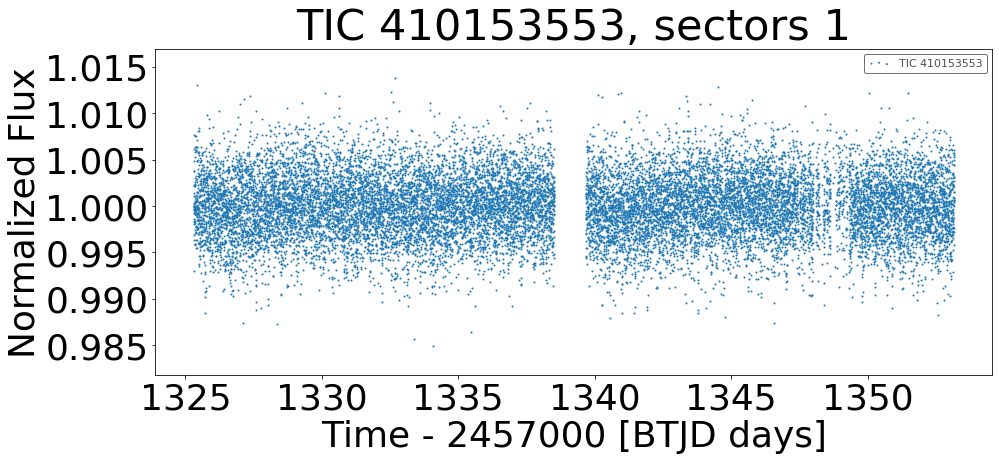

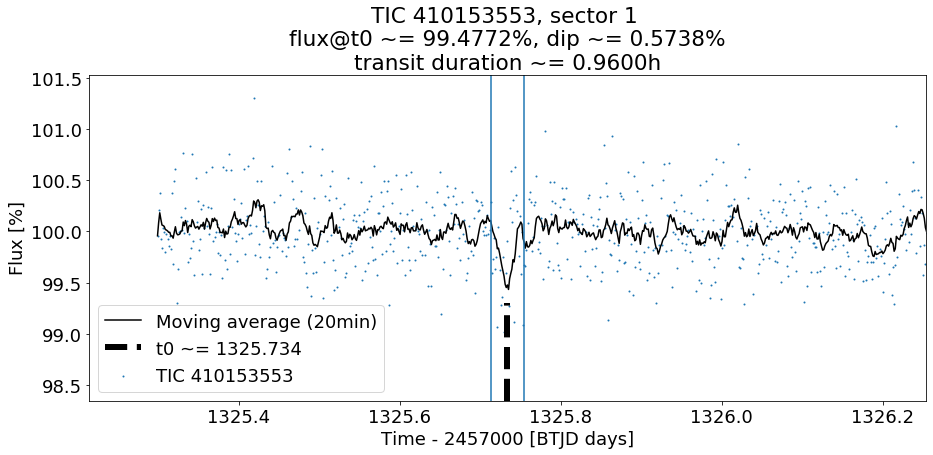

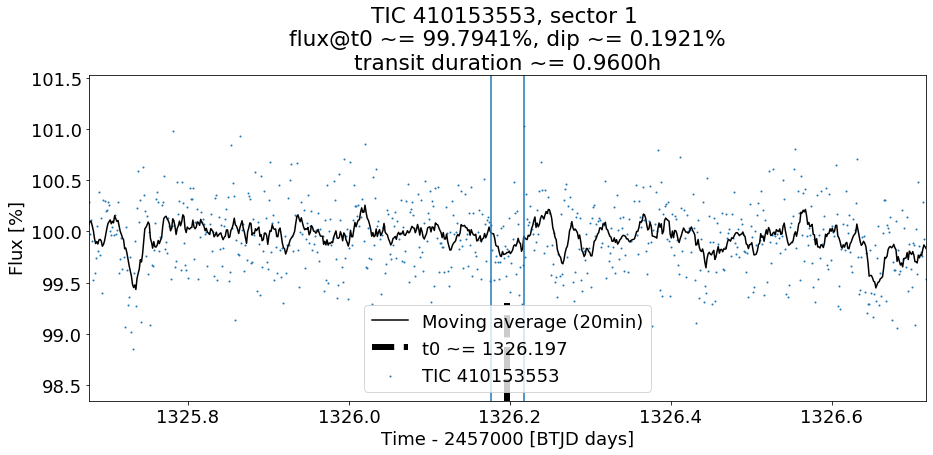

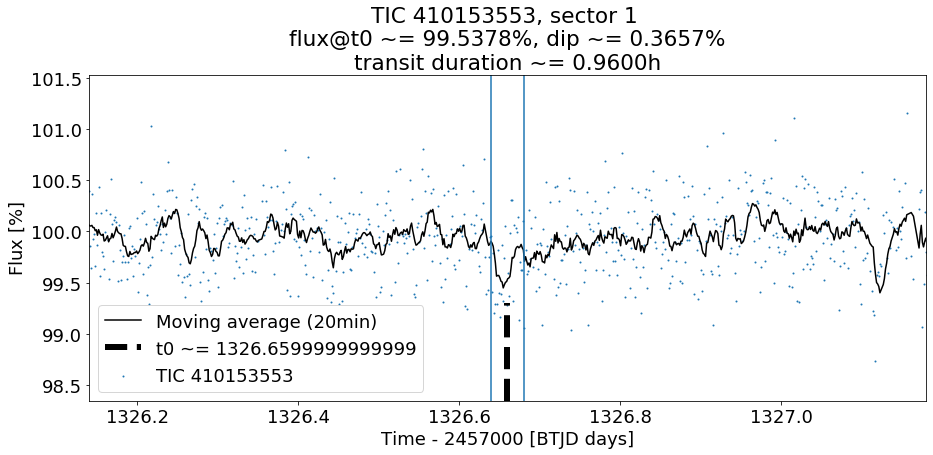

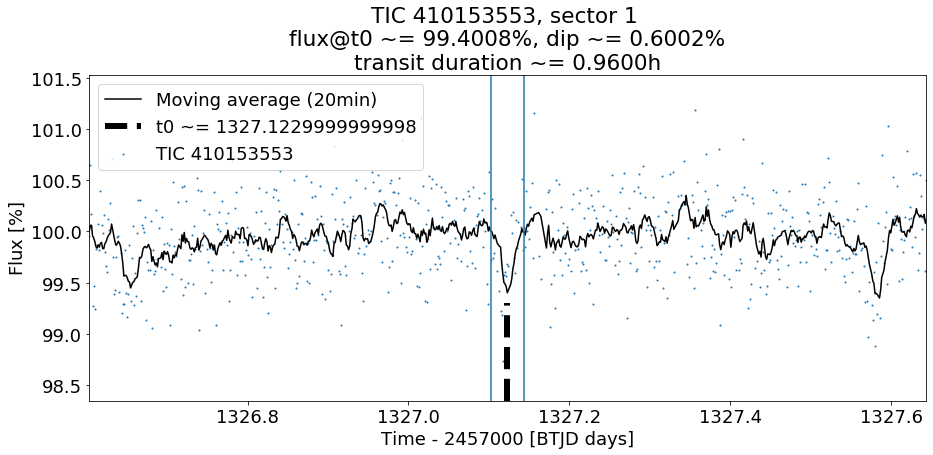

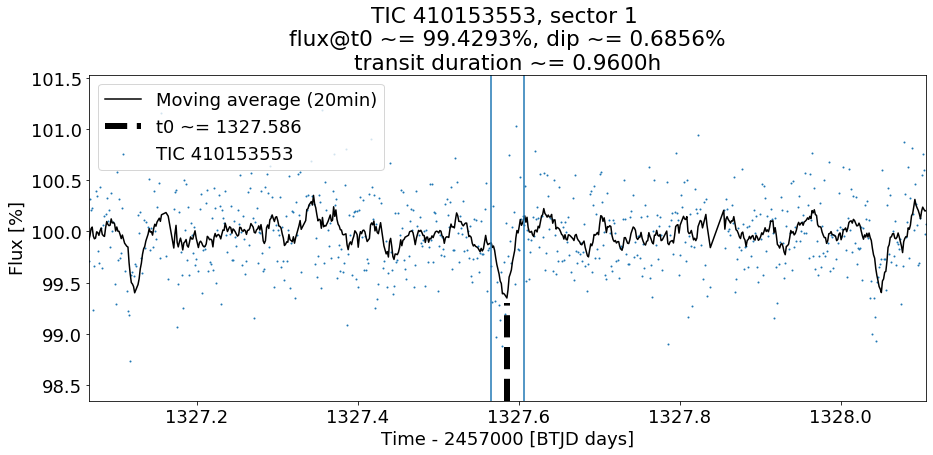

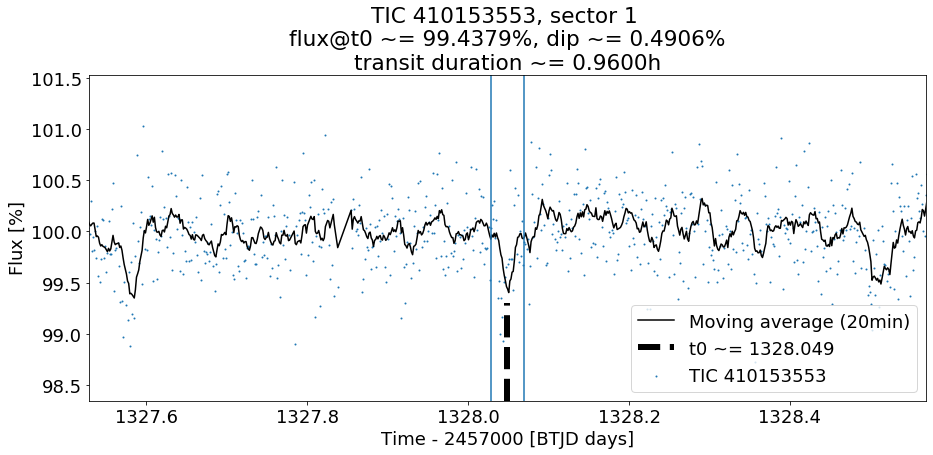

In [8]:
def plot_a_dip(lc, ax, t0, period, transit_duration, offset, moving_avg_window, lc_tweak_fn=None):    
    t0_touse = t0 + period * offset
    tplt.plot_n_annotate_lcf(lc, ax
                             , moving_avg_window=moving_avg_window
                             , lc_tweak_fn=lc_tweak_fn
                        , t0=t0_touse, t_start=t0_touse - transit_duration/2, t_end=t0_touse + transit_duration/2
                       )
    
def plot_selected(lcf_coll):                      
    matplotlib.rcParams.update({'font.size':18}) 
    matplotlib.rcParams.update({'font.family':'sans-serif'})
    # plot a series of dips
    # - note: no dip at offset 1, probably due to noises
    for offset in range(0, 6):
        plot_a_dip(tplt.lcf_of_sector(lcf_coll, 1), ax=tplt.lcf_fig().gca()
                   , t0=1325.734
                   , period=0.463
                   , transit_duration=0.04
                   , offset=offset
                   , moving_avg_window='20min'
                   , lc_tweak_fn=lambda lc: lc.remove_outliers()
                  )    
    return 

                     
tplt.plot_all(lcf_coll, lambda lc: lc.remove_outliers())

plot_selected(lcf_coll)

print("Sectors: " + str(list(map(lambda lcf: lcf.get_header()['SECTOR'], lcf_coll))))


In [6]:
print(list(map(lambda lc: lc.get_header()['SECTOR'], lcf_coll)))
print(list(map(lambda lc: lc.get_header()['CAMERA'], lcf_coll)))
print(list(map(lambda lc: lc.get_header()['DATE-OBS'], lcf_coll)))


[1]
[3]
['2018-07-25T19:01:42.709Z']


In [7]:
# combine all the observations together
# or I can just use lcf_coll.stich()
lc = None
for i in range(0, len(lcf_coll)):
    lc_cur = lcf_coll[i].get_lightcurve('PDCSAP_FLUX')
    if lc == None:
        lc = lc_cur    
    else:
        lc.append(lc_cur, inplace=True)
    
print(len(lc.time))

for i in range(0, len(lcf_coll)):
    lc_cur = lcf_coll[i].get_lightcurve('PDCSAP_FLUX')
    print(f"  Sector {lcf_coll[i].get_header()['SECTOR']}: {lc_cur.time.min()} - {lc_cur.time.max()}")

print(lc.time.max()  - lc.time.min())

# use the interactive transit period detection
#   caveat: un-sure if combining observations over time make sense for the algorithm
lc.interact_bls()


18104
  Sector 1: 1325.2991611658865 - 1353.1793899108168
27.880228744930264
